<a href="https://colab.research.google.com/github/wormulus/ok_cupid_project/blob/main/OK_Cupid_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring OK Cupid Data

In [ ]:
#@title Import what we need
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# mount drive to access .csv
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#@title Load .csv as dataframe
# define data path
data_path = "/content/drive/My Drive/Colab Notebooks/profiles.csv"

# load csv as dataframe
profiles = pd.read_csv(data_path)

In [3]:
#@title Look at first few rows to examine data 
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
#@title Length of Data
print(f'There are {profiles.shape[0]} rows in the dataframe')
print(f'There are {profiles.shape[1]} columns in the dataframe')

There are 59946 rows in the dataframe
There are 31 columns in the dataframe


The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


In [5]:
#@title Looking to see how many null values there are in each column.
print(profiles.isnull().sum())

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64


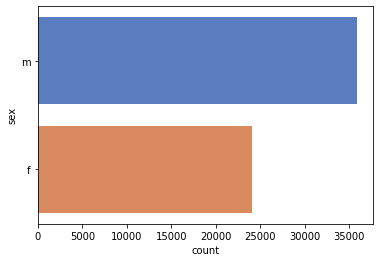

In [7]:
#@title Number of Male vs Female Users
sns.set_palette("muted")
sns.countplot(data=profiles, y="sex")

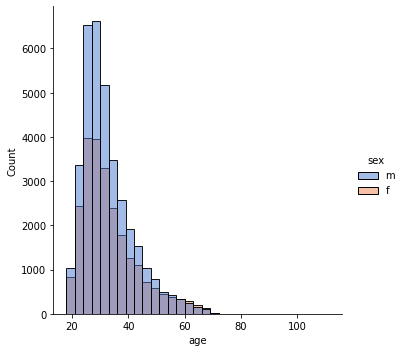

In [8]:
#@title Distribution of Ages by Gender
sns.displot(data=profiles, x="age", kind="hist", hue="sex", binwidth = 3)
plt.show()

### Observations
- There are more women than men who use the app
- Age distribution is right-skewed and averages around 25-25 years old
- Offspsring, Religion, and Diet are the questions least likely to be answered
- Essay 8 is the least likely question to be answered. "The most private thing I am willing to admit" is the question, so I feel like that makes sense.


In [9]:
#@title Jobs by Count
print(profiles['job'].value_counts())

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64


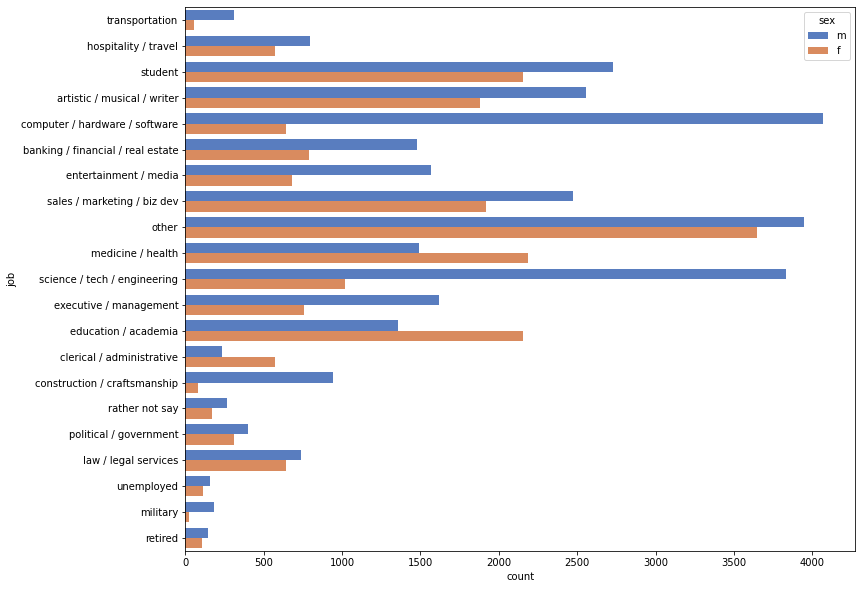

In [11]:
#@title Jobs by Count, separated by gender
plt.figure(figsize=(12,10))
sns.countplot(data=profiles, y="job", hue='sex')

### Observations
- Of the people who answered, `student`, `science / tech / engineering`, `computer / hardware / software`, and `artistic / musical / writer` are the most common professions
- These are all professions that have more male users
- The ratio of male to female users who work in `science / tech / engineering` or `computer / hardware / software` is very high. The ratio of men to women in `education / academia` is low. This parallels the larger societal trends of men in STEM jobs and women in teaching jobs

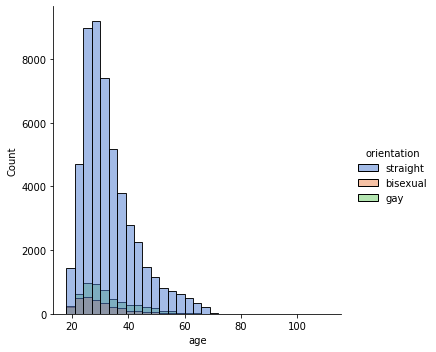

In [12]:
#@title Sexual Orientation Age Distribution
sns.displot(data=profiles, x="age", kind="hist", hue="orientation", binwidth = 3)

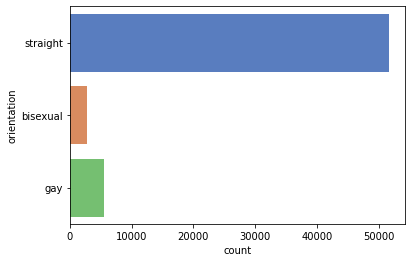

In [13]:
#@title Sexual Orientation Count
sns.countplot(data=profiles, y="orientation")

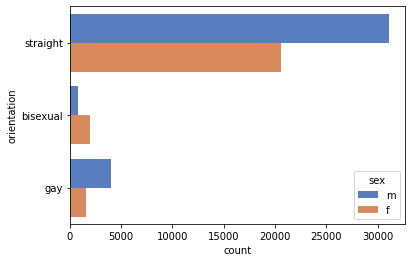

In [14]:
#@title Sexual Orientation by Gender
sns.countplot(data=profiles, y="orientation", hue = "sex")

### Observations
- By count there's more men than women who are `straight` and `gay` but interestingly, there's more female users who ID as `bisexual`
- There are primarily `Straight` users
- Obviously this dataset is incomplete, b/c there's no `lesbian`, `queer` etc. identities. So I'm just making observations with what I have

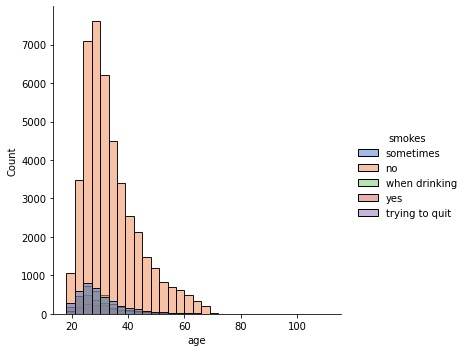

In [16]:
#@title Smoking Age Ditribution
sns.displot(data=profiles, x="age", kind="hist", hue="smokes", binwidth = 3)
plt.show()

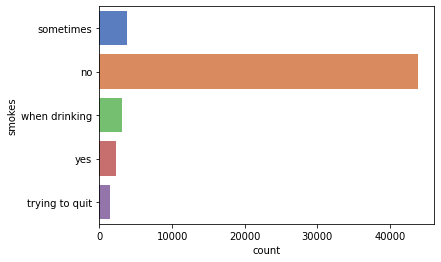

In [17]:
#@title Count of Smoking Status
sns.countplot(data=profiles, y="smokes")

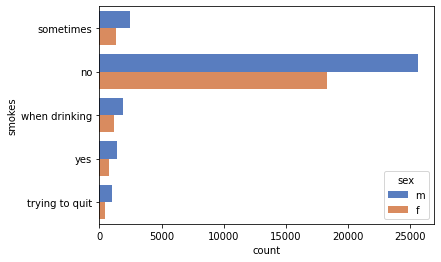

In [19]:
#@title Smoking Status Count by Gender
sns.countplot(data=profiles, y="smokes", hue="sex")

In [21]:
#@title Smoking Status Percentages by Gender
print('Smoking Status Percentages (male)')
print(profiles[profiles['sex'] == 'm']['smokes'].value_counts(normalize=True))
print('\nSmoking Status Percentages (female)')
print(profiles[profiles['sex'] == 'f']['smokes'].value_counts(normalize=True))

Smoking Status Percentages (male)
no                0.791961
sometimes         0.074794
when drinking     0.058018
yes               0.044333
trying to quit    0.030894
Name: smokes, dtype: float64

Smoking Status Percentages (female)
no                0.827600
sometimes         0.061908
when drinking     0.052663
yes               0.036075
trying to quit    0.021754
Name: smokes, dtype: float64


In [24]:
#@title Statistical Analysis of Smoking Significance by Gender
# prepping data to see if it's statistically significant that males are more likely to smoke
# make a df copy with just sex and smoking status
profiles_smoking = profiles[['sex', 'smokes']].copy()

# drop null values. don't know enough about smoking status to determine replacement
profiles_smoking.dropna(inplace=True)

# order from no = 0 to yes = 4 
scale_mapper = {'no': 0, 'trying to quit': 1, 'when drinking': 2, 'sometimes': 3, 'yes': 4}

# transform column "smokes"
profiles_smoking["smoking_mapped"] = profiles_smoking["smokes"].replace(scale_mapper)

# perform t-test for 2 independent variables assuming null hypothesis
from scipy.stats import ttest_ind
a = profiles_smoking[profiles_smoking['sex'] == 'm']['smoking_mapped']
b = profiles_smoking[profiles_smoking['sex'] == 'f']['smoking_mapped']
stat, pval = ttest_ind(a, b, random_state=None)

print(f'The pval is {pval}, which is smaller than threshold, thus showing significance of gender on smoking status')

The pval is 1.342639283579781e-20, which is smaller than threshold, thus showing significance of gender on smoking status


### Observations
- Seems like the majority of people are non-smokers or only occasional smokers
- The age of people who smoke (occasionally or not) tends to skew younger than the non-smokers
- Females are less likely to smoke. T-test confirms statistical significance with a pval of 1.34e-20 (<< 0.05 threshold)

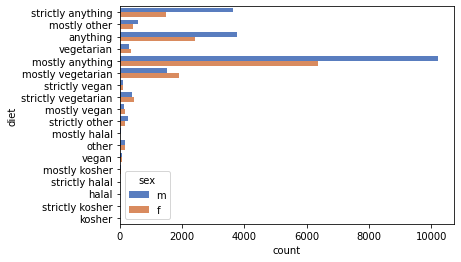

In [26]:
#@title Count of Diet by Gender
sns.countplot(data=profiles, y="diet", hue="sex");

### Observations
- `Vegetarian`, `Mostly vegetarian`, and `Strictly vegetarian` more likely to be female

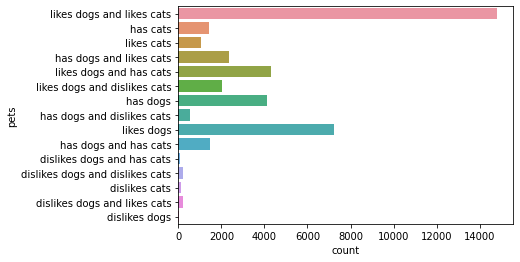

In [27]:
#@title Count of Pets
sns.countplot(data=profiles, y="pets")

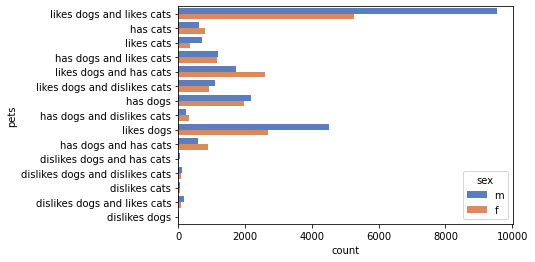

In [28]:
#@title Count of Pets by Gender
sns.countplot(data=profiles, y="pets", hue = "sex")


### Observations
- Majority of people who've answered this question have and/or like dogs
- More women have cats than men


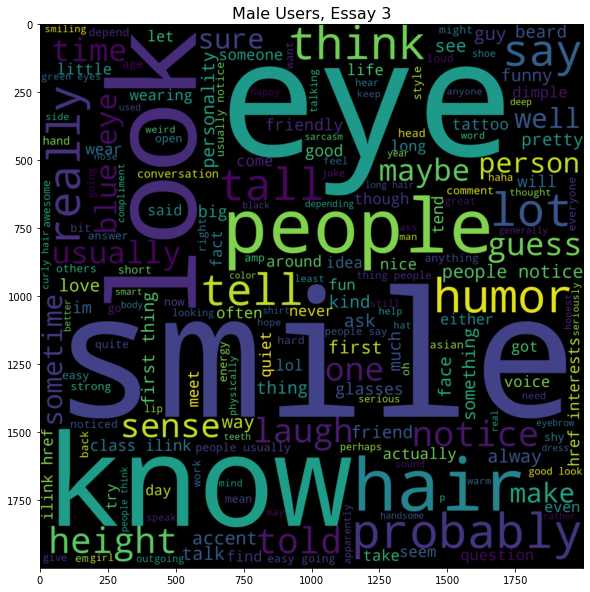

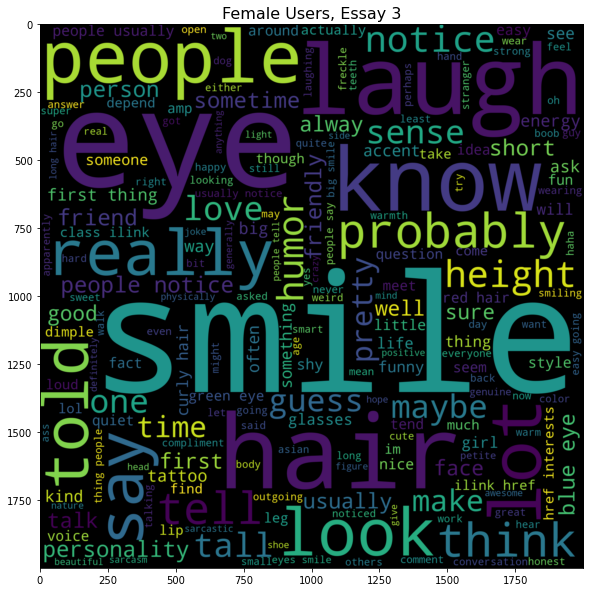

In [31]:
#@title Looking at Essay 3 Answers (First Thing People Notice About You)
from wordcloud import WordCloud, STOPWORDS

stopwords =  ['br']
stop_words = stopwords + list(STOPWORDS)
text = profiles.loc[((profiles['sex'] == 'm') & (pd.notnull(profiles['essay3']) == True))].essay3.tolist()
text = ' '.join(text).lower()
wc = WordCloud(width=2000, height=2000, stopwords=stop_words).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("Male Users, Essay 3", fontsize = 16)
plt.show()

stopwords =  ['br']
stop_words = stopwords + list(STOPWORDS)
text = profiles.loc[((profiles['sex'] == 'f') & (pd.notnull(profiles['essay3']) == True))].essay3.tolist()
text = ' '.join(text).lower()
wc = WordCloud(width=2000, height=2000, stopwords=stop_words).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("Female Users, Essay 3", fontsize = 16)
plt.show()



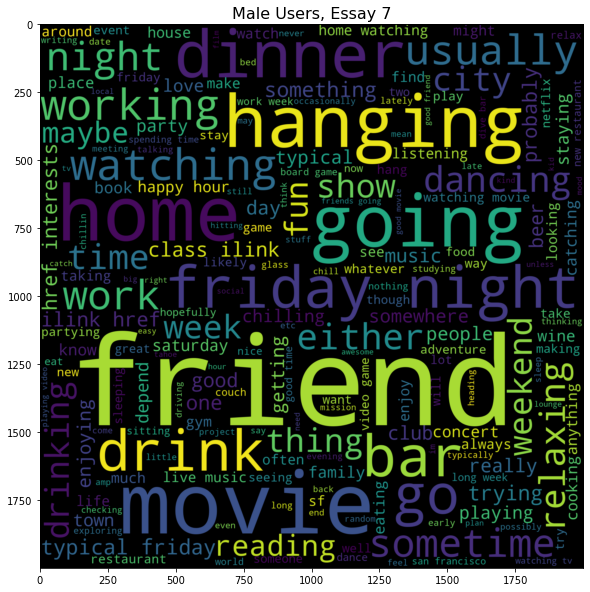

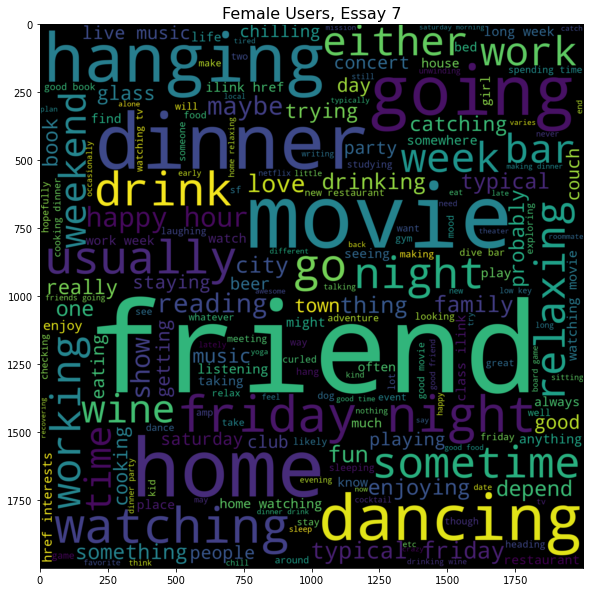

In [32]:
#@title Looking at Essay 7 Answers (What Are You Doing on Saturday Night)
stopwords =  ['br']
stop_words = stopwords + list(STOPWORDS)
text = profiles.loc[((profiles['sex'] == 'm') & (pd.notnull(profiles['essay7']) == True))].essay7.tolist()
text = ' '.join(text).lower()
wc = WordCloud(width=2000, height=2000, stopwords=stop_words).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("Male Users, Essay 7", fontsize = 16)
plt.show()

stopwords =  ['br']
stop_words = stopwords + list(STOPWORDS)
text = profiles.loc[((profiles['sex'] == 'f') & (pd.notnull(profiles['essay7']) == True))].essay7.tolist()
text = ' '.join(text).lower()
wc = WordCloud(width=2000, height=2000, stopwords=stop_words).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title("Female Users, Essay 7", fontsize = 16)
plt.show()


### Observations

- "Eyes" and "Smile" are the things people most commonly say people notice about them, male and female
- Male and Female users both seem likely to be hanging out with friends on the weekend